In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#importing the data set
df = pd.read_csv('/Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [14]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",'0')
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.isnull().sum().sum()

np.int64(0)

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df["customerID"].duplicated().sum()

np.int64(0)

In [19]:
#converting the seniorcitizen binary to yes no
def conv(value):
  if value == 1:
    return "yes"
  else:
    return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


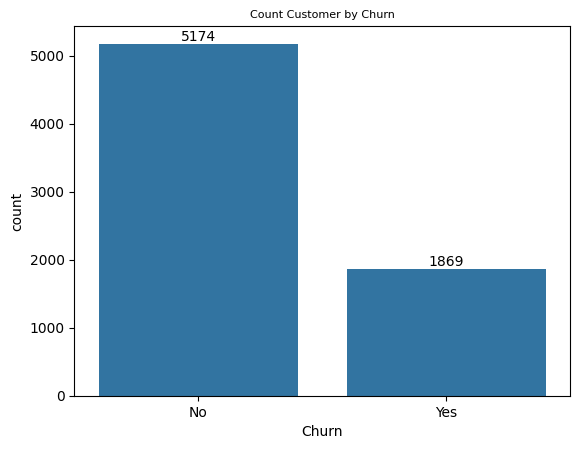

In [21]:

ax = sns.countplot(x = 'Churn' , data = df)
plt.title("Count Customer by Churn", fontsize = 8)
ax.bar_label(ax.containers[0])
plt.show()




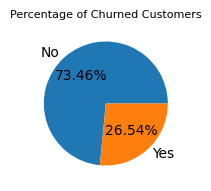

In [22]:
plt.figure(figsize=(2,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels= gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers" , fontsize = 8)
plt.show()

# #**from** the given pie chart we can conclude that 26.54% of the ustomers have churned out.
#now let's explore the reson behind it

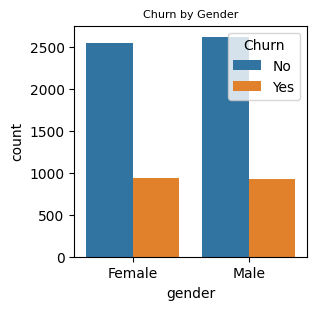

In [23]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'gender' , data = df, hue = 'Churn')
plt.title("Churn by Gender" , fontsize = 8)
plt.show()

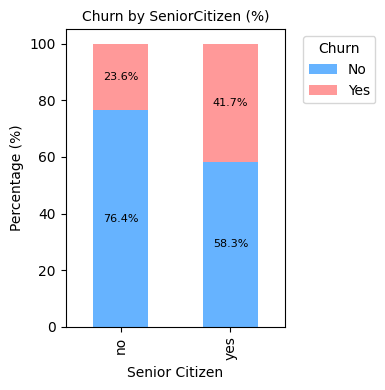

In [24]:


# Compute the normalized (percentage) counts
churn_pct = (
    df.groupby('SeniorCitizen')['Churn']
    .value_counts(normalize=True)
    .unstack() * 100
)

# Create the stacked bar chart
churn_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(4,4),
    color=['#66b3ff', '#ff9999']
)

# Add title and labels
plt.title("Churn by SeniorCitizen (%)", fontsize=10)
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")

# Add percentage labels on bars
for i, col in enumerate(churn_pct.columns):
    for j, val in enumerate(churn_pct[col]):
        plt.text(j, churn_pct.iloc[j, :i+1].sum() - val/2, f"{val:.1f}%",
                 ha='center', va='center', fontsize=8, color='black')

plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


comparatively a greter percentage of people in senior citizens category have churned

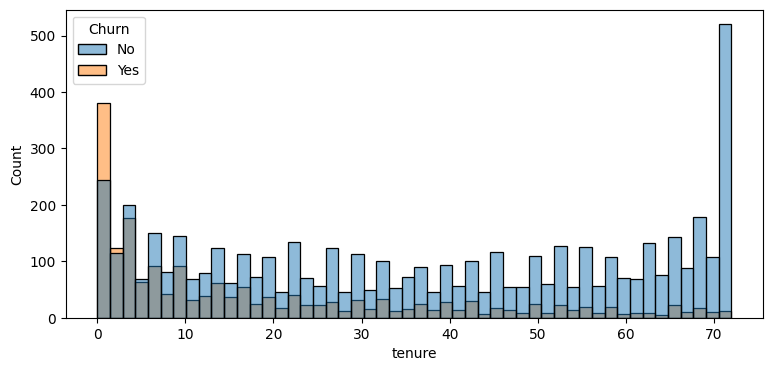

In [26]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure" , data = df , bins = 50 , hue = "Churn")
plt.show()

people who used our services for long time have stayed and people who have used our services have churned out in 1 month


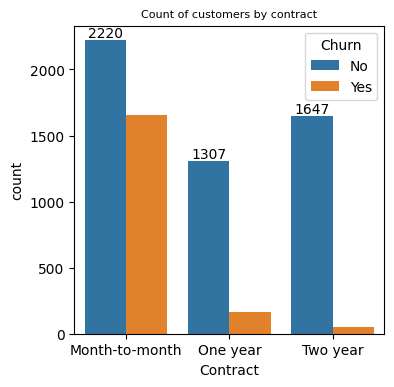

In [29]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'Contract' , data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of customers by contract" , fontsize = 8)
plt.show()

prople have m-to-m contract are likely to churn then from who have 1 or 2 yer of contract


In [30]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

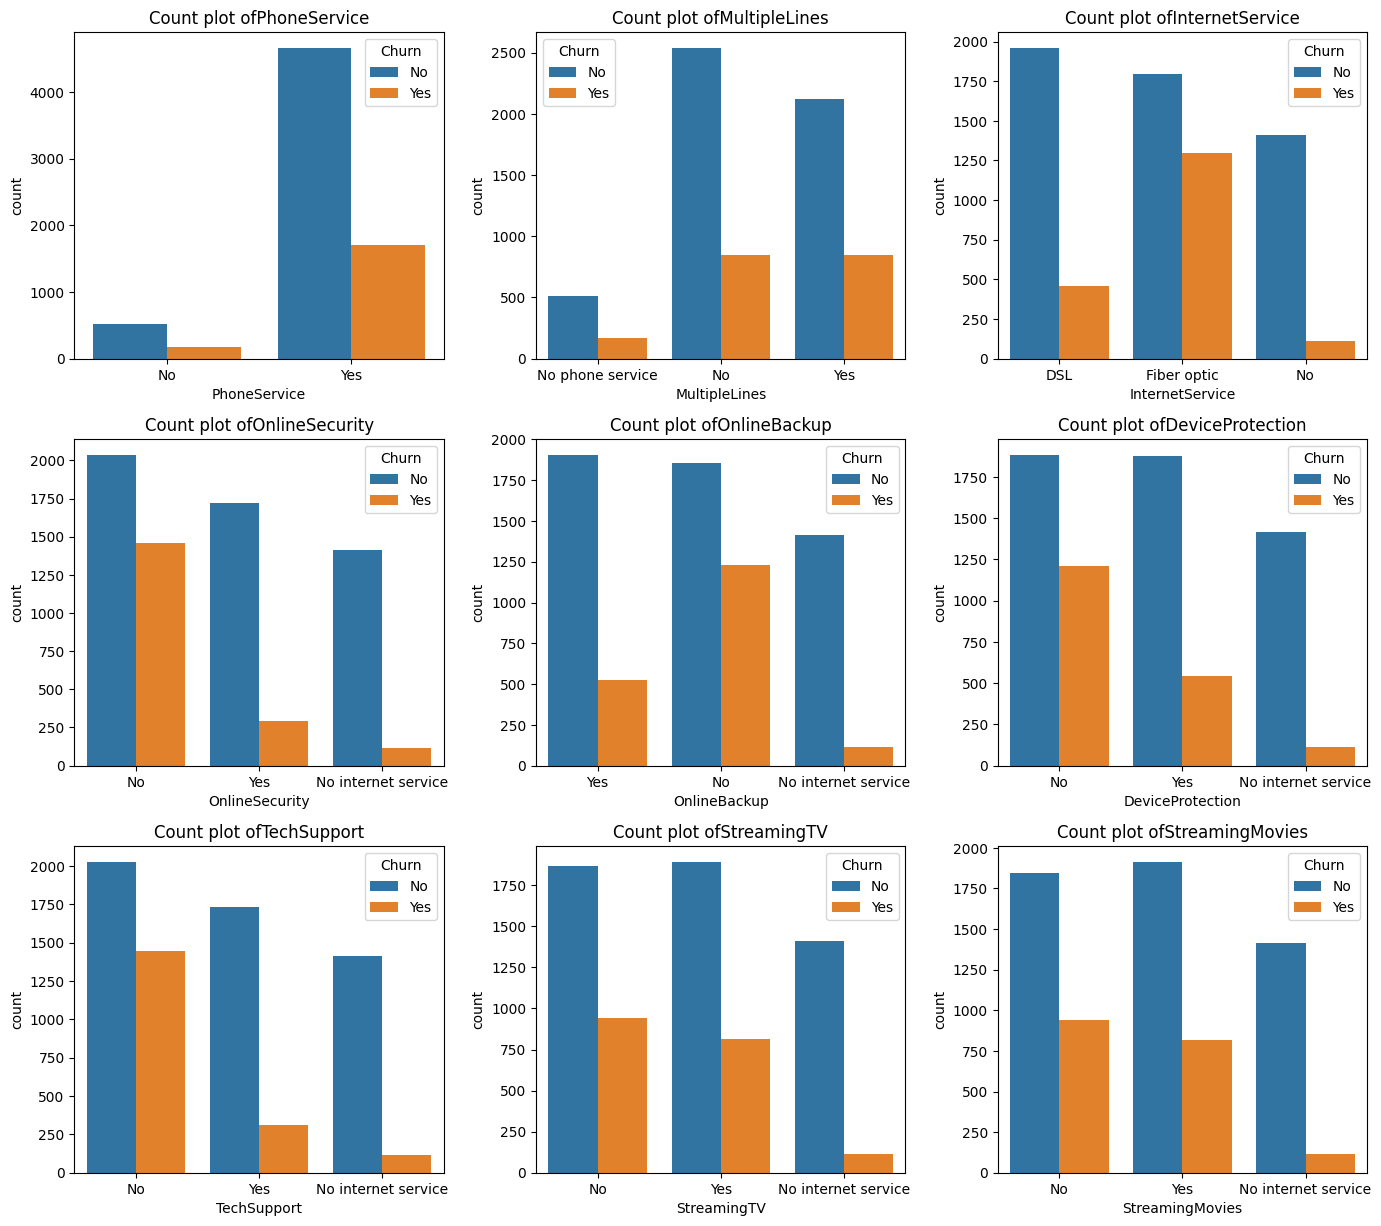

In [41]:
# Example: if your DataFrame is called df
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
n_cols = 3
n_rows = (len(cols) + n_cols +1) // n_cols
fig, axes = plt.subplots(n_rows,n_cols,figsize=(14,n_rows*4))
axes = axes.flatten()
for i , col in enumerate(cols):
  sns.countplot(x=col,data=df,ax=axes[i], hue = df['Churn'])
  axes[i].set_title(f'Count plot of{col}')
  axes[i].set_xlabel(col)
for j in range (i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

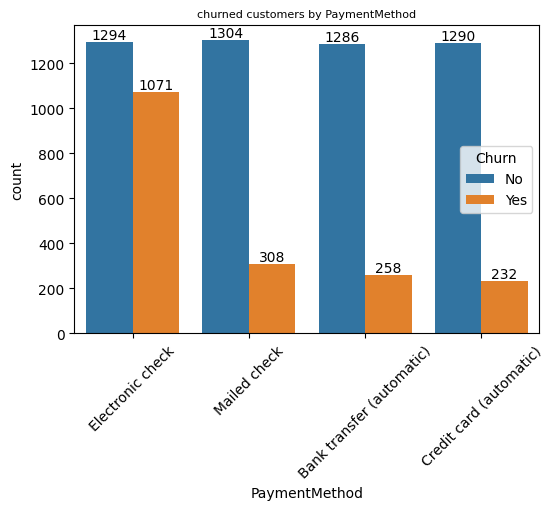

In [47]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = 'PaymentMethod' , data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("churned customers by PaymentMethod" , fontsize = 8)
plt.xticks(rotation = 45)
plt.show()